# Exercise 6.5

**Steps 1-2:**

In [1]:
#1. Install and import all necessary libraries in your Jupyter notebook.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [7]:
#2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing.
path = r'C:/Users/javed/Achievement 6'

In [8]:
df = pd.read_excel(os.path.join(path, 'Data', 'tab_6.xlsx'), index_col = False)

**Cleaning/Consistency Checks:**

In [9]:
df.isnull().sum()

Date Reported        0
Country              0
New Cases            0
Cumulative Cases     0
New Deaths           0
Cumulative Deaths    0
dtype: int64

In [11]:
dup = df.duplicated()

In [12]:
dup.shape

(163076,)

No missing or duplicate data found.

<AxesSubplot:xlabel='New Cases', ylabel='Count'>

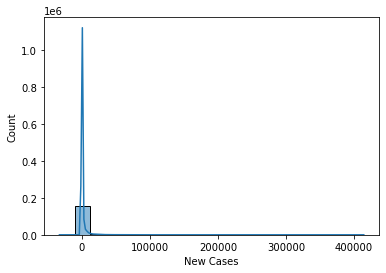

In [13]:
sns.histplot(df['New Cases'], bins=20, kde=True)

In [10]:
#No categorical data can be present for a K-mean algorithm, so 'Country' will be removed in a new subset.

df1 = df[[ 'New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths']]

**Steps 3-4:**

In [11]:
#3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))]

C:\Users\javed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [13]:
score

[-4920681599433681.0,
 -1245738423758445.5,
 -631453548965936.0,
 -288069003525095.44,
 -175784043014246.06,
 -92424997701728.6,
 -47837359388748.94,
 -29995250745609.527,
 -22520934556000.383]

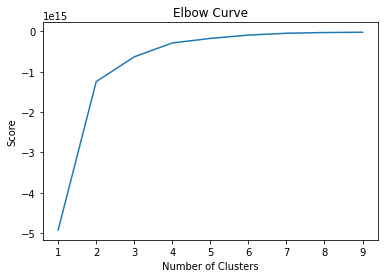

In [14]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The line flattens at 3, indicating that the number of clusters is **3**.

**Steps 5-8:**

In [15]:
# Run the k-means algorithm.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [16]:
kmeans.fit(df1)

C:\Users\javed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [17]:
#6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. 
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\javed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-17-2a0258395ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [18]:
df1.head()

,New Cases,New Deaths,Cumulative Cases,Cumulative Deaths,clusters
0,217119,3330,19614114,352144,2
1,58718,1111,7563551,192681,2
2,21822,299,10266674,148738,2
3,16099,971,1496068,147625,0
4,1588,143,1010496,93066,0


In [19]:
df1['clusters'].value_counts()

0    456
2     14
1      2
Name: clusters, dtype: int64

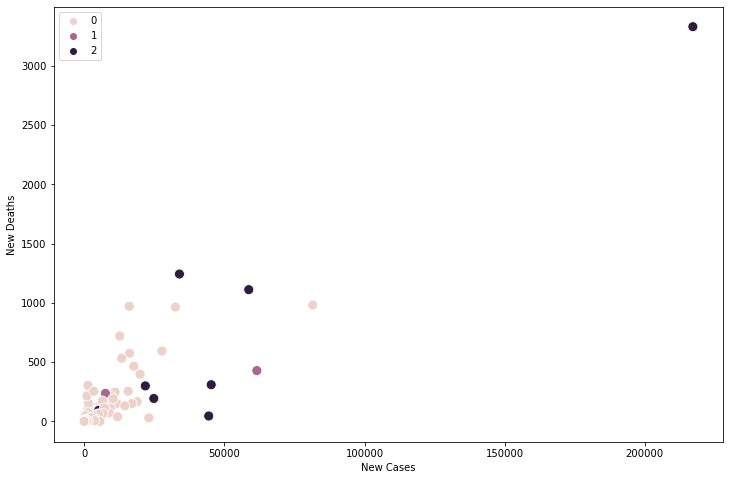

In [20]:
#7. Create a few different visualizations using your clustered data. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['New Cases'], y=df1['New Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('New Cases') 
plt.ylabel('New Deaths') 
plt.show()


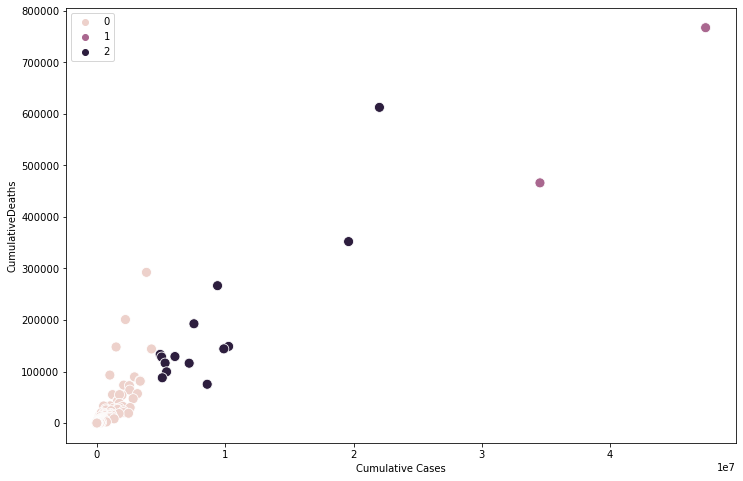

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Cumulative Cases'], y=df1['Cumulative Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Cumulative Cases') 
plt.ylabel('CumulativeDeaths') 
plt.show()

In [ ]:
#8. Discuss how and why the clusters do or don't make sense.

The first visual shows new COVID-19 cases vs deaths. This chart is easier to read out of the two, and you can see some patterns in the clusters. However, the second visual shows cumulative COVID-19 cases vs deaths. This chart is a bit harder to interpret. 

In [41]:
#9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
df1.groupby('cluster').agg({'New Cases':['mean', 'median'], 
                         'Cumulative Cases':['mean', 'median'], 
                         'New Deaths':['mean', 'median'],
                          'Cumulative Deaths':['mean', 'median']})

New Cases          Cumulative Cases               New Deaths  \
                     mean   median             mean      median         mean   
cluster                                                                        
dark purple  21878.401283  13075.5     5.344092e+06   4613557.0   383.706811   
pink           743.204070     12.0     1.343240e+05      5067.0    17.520004   
purple       72457.365439  43581.5     2.995348e+07  31055173.5  1175.192635   

                   Cumulative Deaths          
            median              mean  median  
cluster                                       
dark purple  199.0     124452.917325  111268  
pink           0.0       3589.747679      76  
purple       727.5     527079.209632  553353

In [ ]:
#10. Propose what these results could be useful for in future steps of an analytics pipeline.

These results show that:

- On average, the **purple** cluster experiences a higher cumulative death rate.
- On average, the **pink** cluster experiences the lowest cumulative death count, and lowest cumulative cases.